In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [69]:
df = pd.read_excel(r'C:\Users\rajes\Downloads\STS-Fall24-FinalExam.xlsx',sheet_name = 'Suites')
df.head()

,City,Room_Type,Revenue
0,Mumbai,Standard,50
1,Mumbai,Deluxe,55
2,Mumbai,Super Deluxe,60
3,Delhi,Standard,30
4,Delhi,Deluxe,45


In [90]:
df.groupby(['City','Room_Type'])['Revenue'].mean()

City       Room_Type   
Bangalore  Deluxe          45.0
           Standard        40.0
           Super Deluxe    50.0
Chennai    Deluxe          30.0
           Standard        30.0
           Super Deluxe    40.0
Delhi      Deluxe          45.0
           Standard        30.0
           Super Deluxe    45.0
Mumbai     Deluxe          55.0
           Standard        50.0
           Super Deluxe    60.0
Name: Revenue, dtype: float64

In [110]:
model = ols('Revenue ~ C(City) + C(Room_Type)',data=df).fit()
annova_table = sm.stats.anova_lm(model)
annova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(City),3.0,750.000000,250.000000,24.0,0.000966
C(Room_Type),2.0,254.166667,127.083333,12.2,0.007688
Residual,6.0,62.500000,10.416667,NaN,NaN


# Inference from ANOVA Summary

In [ ]:
Question 2 :If you did find a significant difference between cities, 
which cities seem to be making a significant difference to revenue? 
What test can you conduct to conclude this?

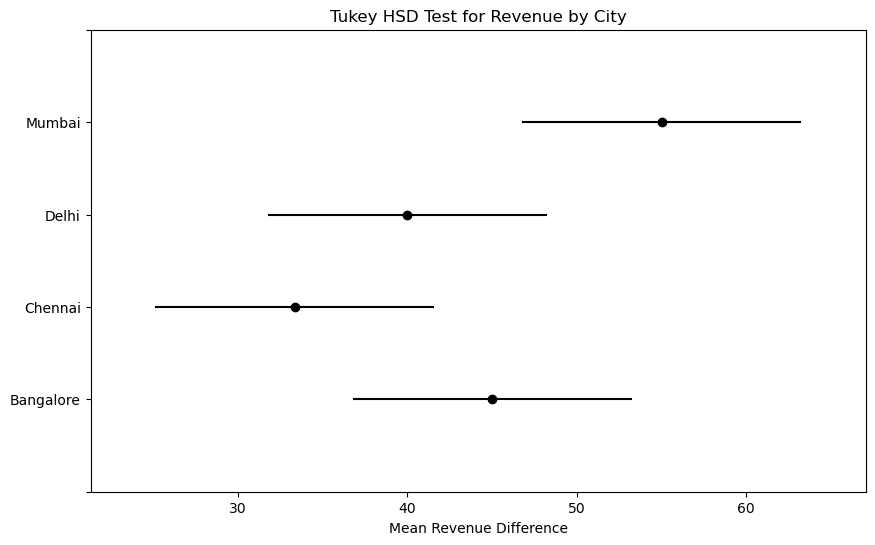

In [117]:
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=df['Revenue'], groups=df['City'], alpha=0.05)
tukey.plot_simultaneous()
plt.title('Tukey HSD Test for Revenue by City')
plt.xlabel('Mean Revenue Difference')
plt.show()